In [165]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# Remove outliar function

In [166]:
#Remove outliars(dataframe , role with outliars)
def RemoveOutLiars(data , rolename):
    Q1 = data[rolename].quantile(0.25) #Q1
    Q3 = data[rolename].quantile(0.75) #Q3
    IQR = Q3 - Q1 #IQR = Q3 - Q1
    count = 0

    tempList = [] #empty list to sort index

    #loop through list to find outliars
    for entry in data[rolename].values.tolist():
        if((entry < (Q1 - 1.5 * IQR)) or  (entry > (Q3 + 1.5 * IQR))):
            #append index
            tempList.append(count)
        count += 1
    
    #return removed list
    return data.drop(tempList)

# Import Data

In [194]:
file = pd.read_csv('GameData_backup_with_review.csv' ,low_memory=0, header=0 , keep_default_na=False , encoding='ANSI')

# Owner Category breakdown

In [168]:
file = file.groupby(
['price',
 'positive',
 'owners',
 '18+',
 'Casual',
 'Indie',
 'Free To Play',
 'RPG',
 'Strategy',
 'Sports',
 'Simulation',
 'Racing',
 'Massivley Multiplayer',
 'Act_Adv',
 'total_lang']
).size().reset_index(name='counts').sort_values("counts", ascending = False)



In [169]:
file

,price,positive,owners,18+,Casual,Indie,Free To Play,RPG,Strategy,Sports,Simulation,Racing,Massivley Multiplayer,Act_Adv,total_lang,counts
6014,0.99,0,20000,0,1,1,0,0,0,0,0,0,0,0,1,70
6110,0.99,1,20000,0,0,1,0,0,0,0,0,0,0,1,1,59
6025,0.99,0,20000,0,1,1,0,0,0,0,0,0,0,1,1,47
8569,1.90,0,20000,0,1,1,0,0,0,0,0,0,0,0,1,47
6149,0.99,1,20000,0,1,1,0,0,0,0,0,0,0,1,1,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11414,2.90,15,20000,0,0,1,0,0,0,0,0,0,0,1,5,1
11411,2.90,15,20000,0,0,1,0,0,0,0,0,0,0,0,11,1
11410,2.90,15,20000,0,0,1,0,0,0,0,0,0,0,0,3,1
11408,2.90,15,20000,0,0,0,0,1,0,0,0,0,0,1,1,1


# Split data to 7:3

In [170]:
from sklearn.model_selection import train_test_split

# split into train and test sets
train, test = train_test_split(file, test_size=0.3, random_state=1)

# summarize
print('Train', test.shape)
print('Test', train.shape)

Train (9559, 16)
Test (22303, 16)


# Display all column names

In [171]:
list(file.columns.values)

['price',
 'positive',
 'owners',
 '18+',
 'Casual',
 'Indie',
 'Free To Play',
 'RPG',
 'Strategy',
 'Sports',
 'Simulation',
 'Racing',
 'Massivley Multiplayer',
 'Act_Adv',
 'total_lang',
 'counts']

31862


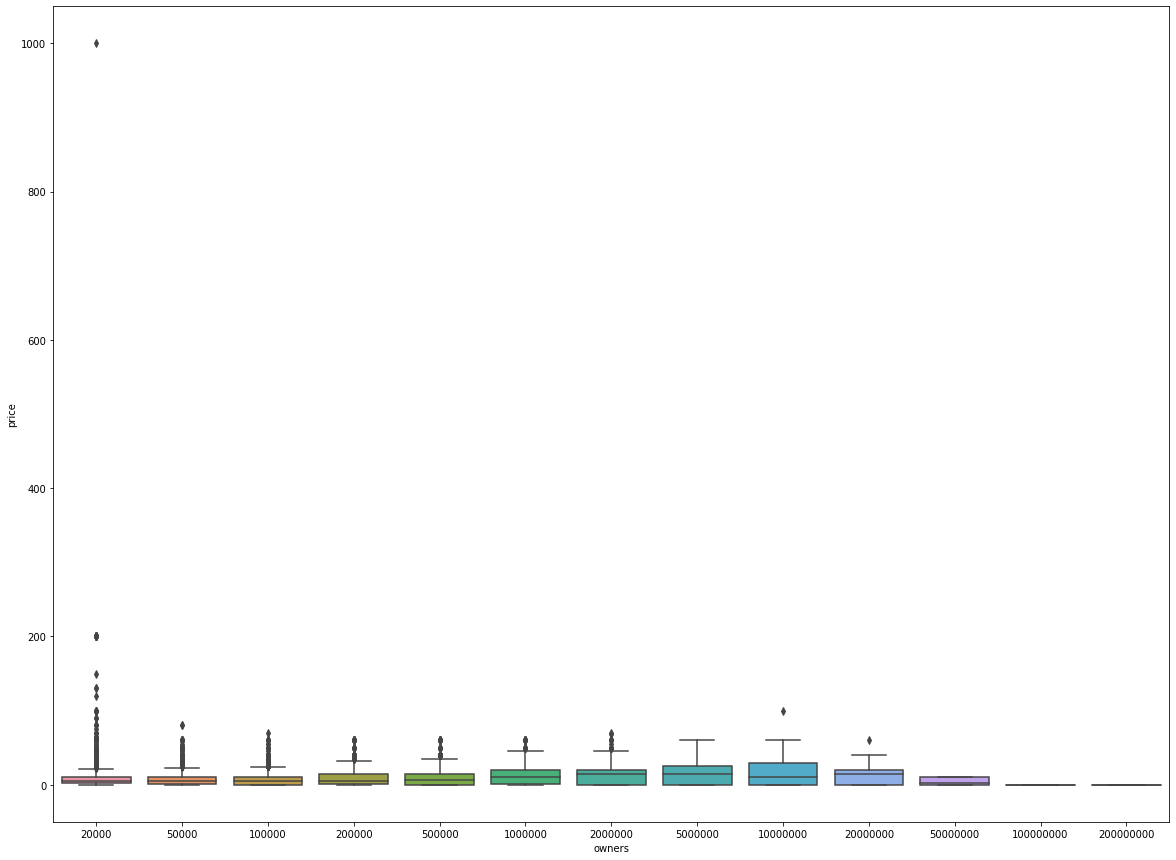

In [172]:
priceOwner_df = pd.DataFrame(file[['price' , 'owners']])

f = plt.figure(figsize=(20,15))
sb.boxplot(y = 'price' , x = 'owners' , data= priceOwner_df)

print(len(priceOwner_df))

In [143]:
#load necessary packages and functions
import scipy.stats as stats
import numpy as np

#create 2x2 table
data = priceOwner_df.to_numpy()

#Chi-squared test statistic, sample size, and minimum of rows and columns
X2 = stats.chi2_contingency(data, correction=False)[0]
n = np.sum(data)
minDim = min(data.shape)-1

#calculate Cramer's V 
V = np.sqrt((X2/n) / minDim)

#display Cramer's V
print(V)


0.028077628243788448


# Removing outlier

In [218]:
temp = file[ file.price != 999.9]

priceOwner_df = pd.DataFrame(temp[['price' , 'owners']])

In [219]:
priceOwner_df

,price,owners
0,4.90,20000
1,0.00,20000
2,9.90,20000
3,0.00,20000
4,9.90,20000
...,...,...
41303,7.90,100000
41304,29.99,100000
41305,0.00,500000
41306,4.90,5000000


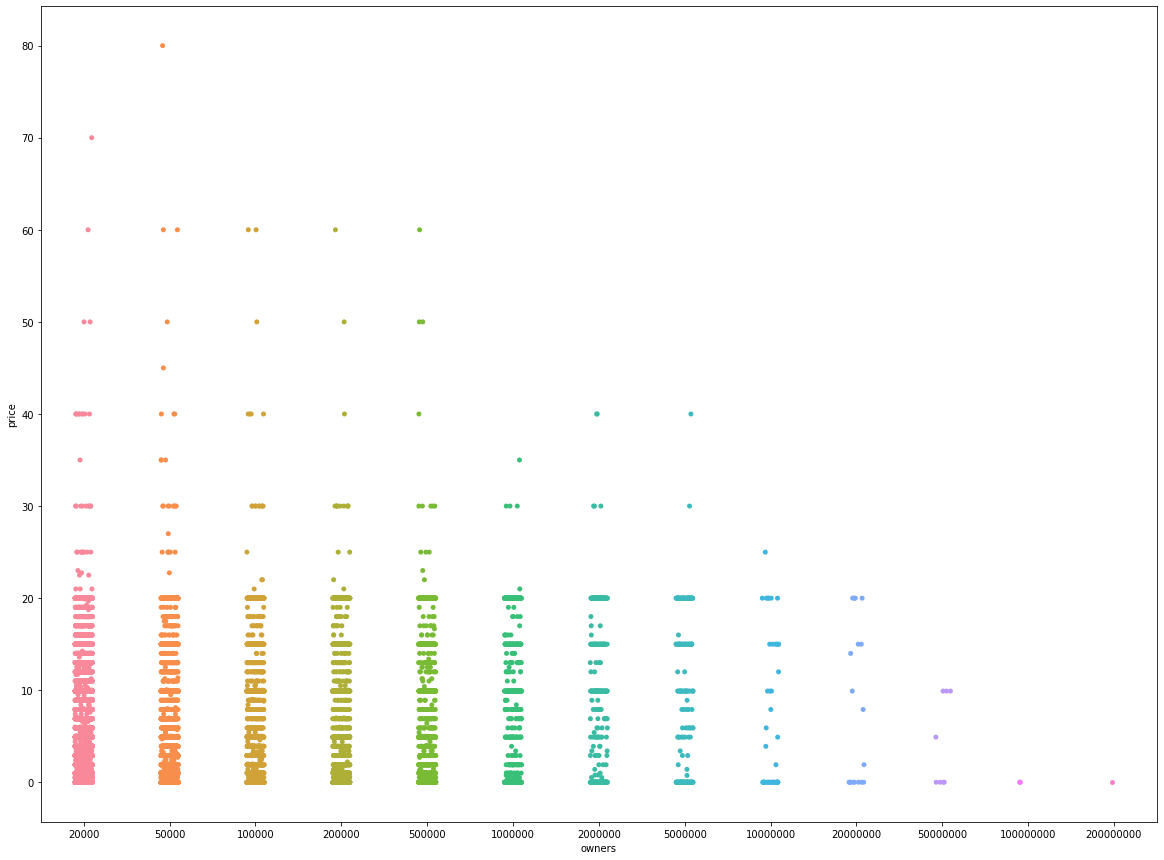

In [221]:
priceOwner_df_clean = RemoveOutLiars(priceOwner_df,'price')

f = plt.figure(figsize=(20,15))
sb.stripplot(y = 'price' , x = 'owners' , data= priceOwner_df_clean )

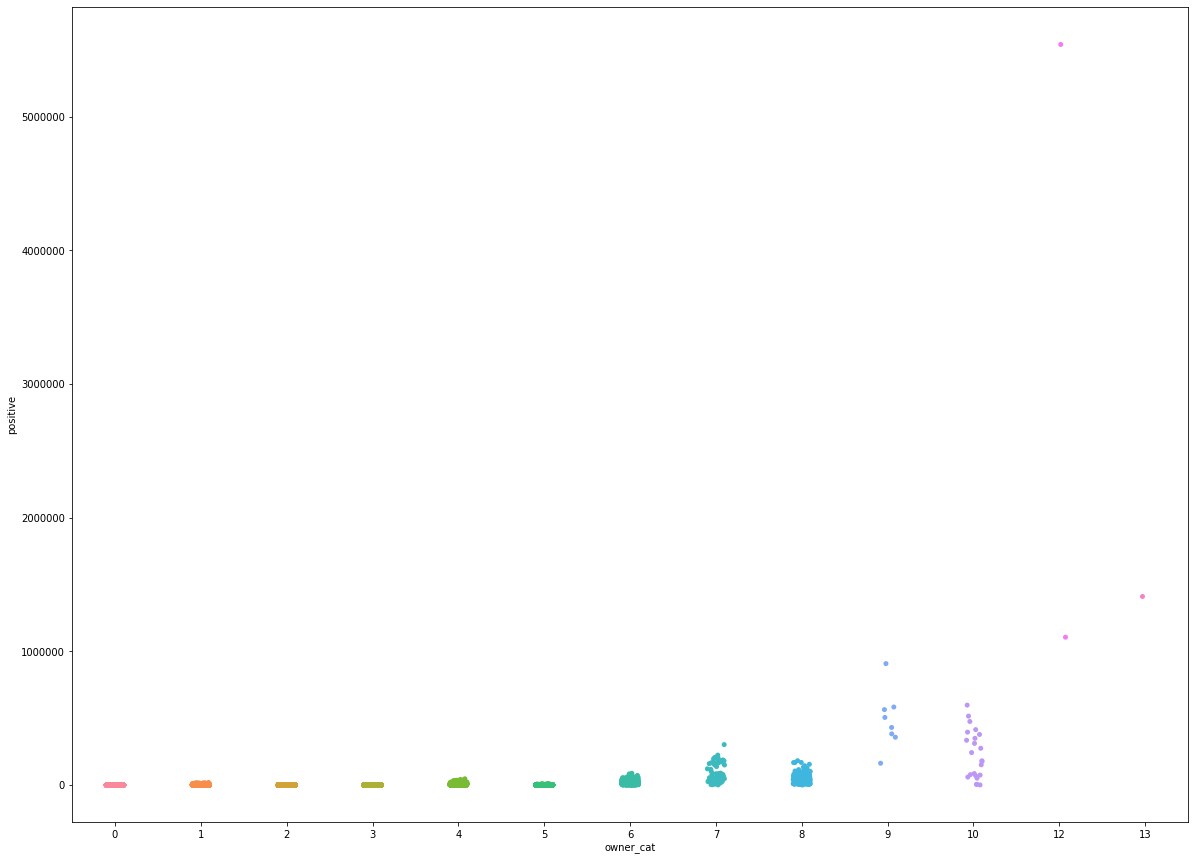

In [222]:
positiveOwner_df = pd.DataFrame(file[['positive' , 'owner_cat']])

f = plt.figure(figsize=(20,15))
sb.stripplot(y = 'positive' , x = 'owner_cat' , data= positiveOwner_df)